#Introduction



# Phase 1: Set-up

In [1]:
 !pip install pandas-profiling
 !pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1d3addbdd810b12931fc59c483b11de7b8e308a8d53949043f68dff7d948ffdb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [3]:
import pandas as pd
import sys
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from scipy.stats import norm, skew
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras import models, layers
# Tensforflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from imblearn.over_sampling import SMOTE












from imblearn.over_sampling import SMOTE



warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('fraudTrain.csv')
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

###Profiling Report

In [5]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

#Phase 2:Data pre-processing

In [7]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

### Checking for Null values

In [8]:
# Check for duplicate rows across all columns
print("Number of NULL values:\n", data.isnull().sum())

Number of NULL values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### Checking for Duplicate Rows

In [9]:
# Check for duplicate rows across all columns
print("Number of Duplicate Rows:", data.duplicated().sum())

Number of Duplicate Rows: 0


### Adding a new features 'Age'

In [10]:
transaction_date = pd.to_datetime(data['trans_date_trans_time'])
birth_date =  pd.to_datetime(data['dob'])
data['age'] = (transaction_date -birth_date) / np.timedelta64(1, 'Y')
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud        age  
0        0  30.815144  
1        0  40.531977  
2        0  56.951205  
3        0  51.970953  
4        0  32.764539  

[5 rows x 24 columns]

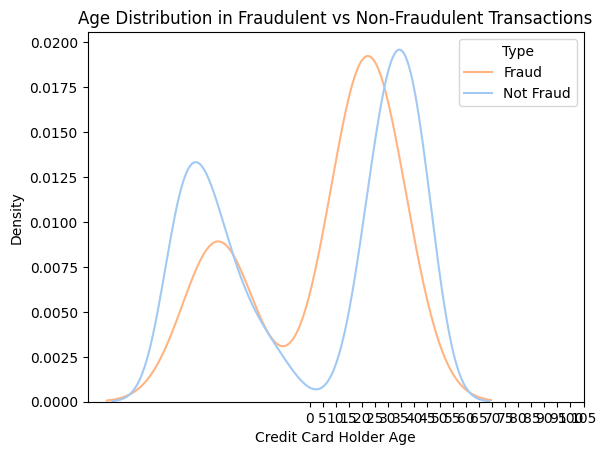

In [ ]:
# Custom palette for "Not Fraud" (blue) and "Fraud" (pink)
pastel_palette = sns.color_palette('pastel')
fraud_palette = {0: pastel_palette[0], 1: pastel_palette[1]}

ax = sns.kdeplot(x='age', data=data, hue='is_fraud', common_norm=False, palette=fraud_palette)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=[ 'Fraud','Not Fraud'])

plt.show()


### Drop unnecessary features

In [11]:
#columns_to_drop = ["Unnamed: 0", "cc_num"]
columns_to_drop = ["Unnamed: 0","first","last","trans_num","cc_num"]
data.drop(columns=columns_to_drop, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   street                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  unix_time         

### Corrlation Matrix between all features

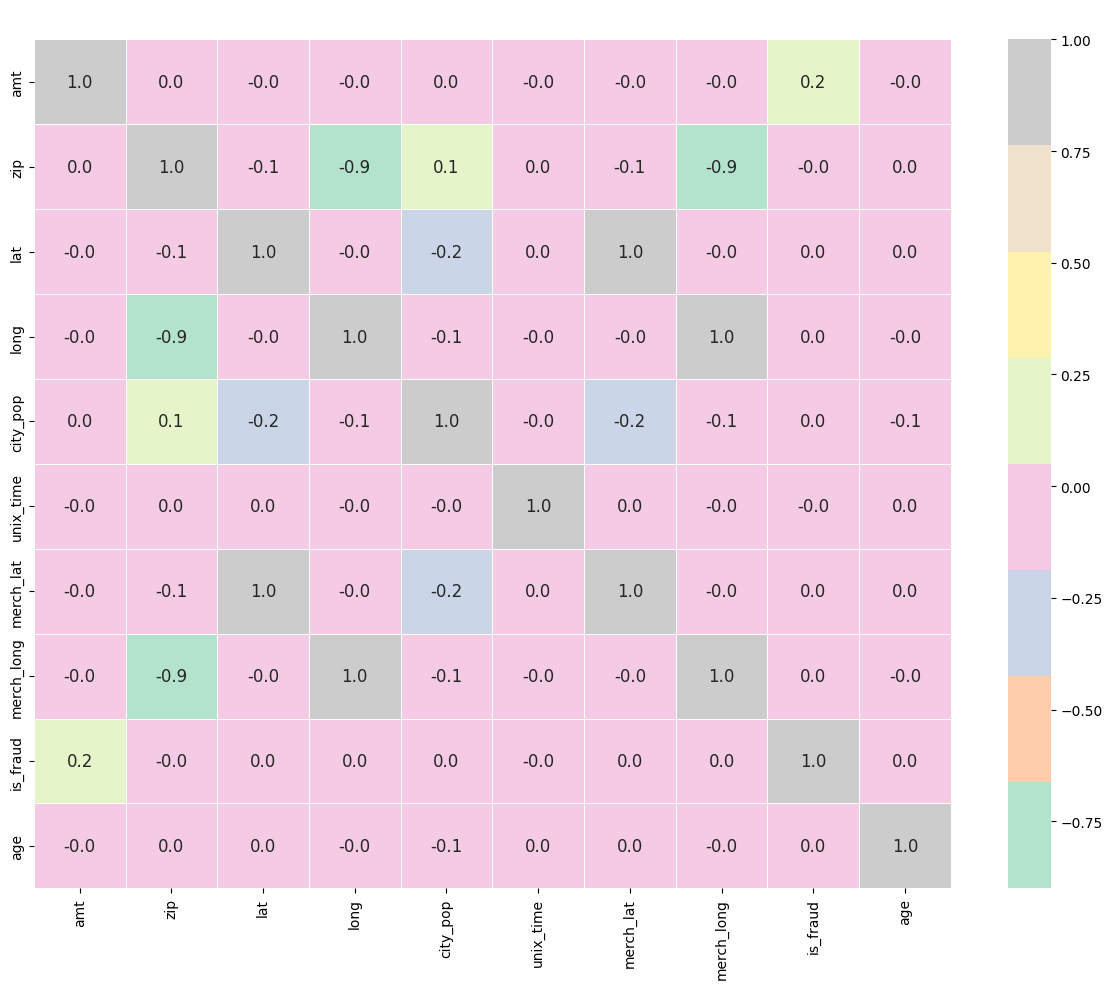

In [12]:
# Calculate the correlation matrix
corr = data.corr().round(1)

plt.figure(figsize=(12, 10))
ax=sns.heatmap(corr, annot=True, cmap='Pastel2', fmt='.1f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Credit Card Fraud - Correlation Heatmap", color="white", size=20)
plt.tight_layout()
plt.show()


### Number of Fraud and Not-Fraud Cases

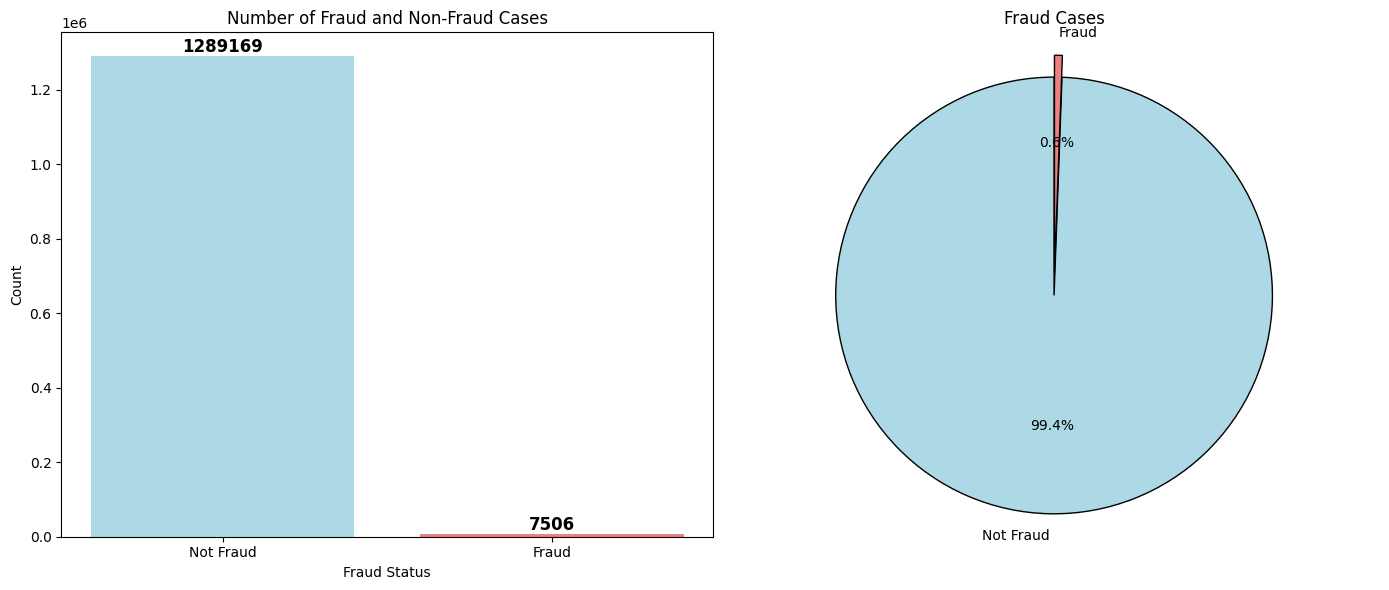

In [13]:
# Count the number of fraud cases
fraud_counts = data["is_fraud"].value_counts()
fraud_labels = fraud_counts.index.tolist()
fraud_values = fraud_counts.tolist()

# Create a figure with one row and two columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar chart on the first subplot (axes[0])
axes[0].bar(['Not Fraud', 'Fraud'], fraud_values, color=['lightblue', 'lightcoral'])
for i, v in enumerate(fraud_values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Fraud and Non-Fraud Cases')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Count')

# Create a pie chart on the second subplot (axes[1])
axes[1].pie(fraud_values, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90,explode = (0.1,0), colors=['lightblue', 'lightcoral'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Fraud Cases')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Sort the mean values in descending order for 'is_fraud' = 1 (fraud) and 'is_fraud' = 0 (not fraud)
fraud_mean = data[data['is_fraud'] == 1].mean().sort_values(ascending=False)
not_fraud_mean = data[data['is_fraud'] == 0].mean().sort_values(ascending=False)

# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot heatmap for 'is_fraud' = 1 (fraud)
plt.subplot(1, 2, 1)
sns.heatmap(fraud_mean.to_frame(), annot=True, cmap='Pastel2', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Fraud Cases')

plt.subplot(1, 2, 2)
sns.heatmap(not_fraud_mean.to_frame(), annot=True, cmap='Pastel2', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Not Fraud Cases')
fig.tight_layout(pad=0)
plt.show()

In [ ]:
# Get the names of categorical features
categorical_features = data.select_dtypes(include='object').columns.tolist()

# Get the names of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

In [ ]:
# Filter the DataFrame to include only fraud cases (where "is_fraud" is 1)
fraud = data[data["is_fraud"] == 1]

# Create a histogram for the "age" column of fraud cases
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor="black", bins=5, color='pink')

plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()


Finding the Outliers

In [ ]:
pastel_palette = sns.color_palette('pastel')

# Create subplots with 5 rows and 1 column
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 24))
fig.suptitle("Count of Fraud and Non-Fraud Cases for each Categorical Feature", y=1, size=20)

# List of categorical features and their respective top 10 categories
categorical_features = {
    'category': data["category"].value_counts(sort=True, ascending=False).index,
    'gender': data["gender"].value_counts(sort=True, ascending=False).index,
    'state': data["state"].value_counts(sort=True, ascending=False).head(10).index,
    'city': data["city"].value_counts(sort=True, ascending=False).head(10).index,
    'job': data["job"].value_counts(sort=True, ascending=False).head(10).index
}

# Iterate through the categorical features
for i, (feature, top_categories) in enumerate(categorical_features.items()):
    # Plot the count of Fraud and Non-Fraud cases for each category
    sns.countplot(data=data, x=feature, hue='is_fraud', order=top_categories, palette=pastel_palette, ax=axes[i])
    axes[i].set_title(f"Count of Fraud and Non-Fraud Cases by '{feature.capitalize()}'")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend(labels=['Not Fraud', 'Fraud'])

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()
plt.show()


In [ ]:
pastel_palette = sns.color_palette('pastel')

# Create a function for custom boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16, 25))
    fig.suptitle(suptitle, y=1, size=20)
    axs = axs.flatten()

    # Custom palette for "Not Fraud" (blue) and "Fraud" (pink)
    fraud_palette = {0: pastel_palette[0], 1: pastel_palette[1]}

    for i, da in enumerate(columns_list):
        axs[i].legend(['Not Fraud', 'Fraud'])  # Add legend labels
        sns.boxplot(data=dataset, x=da, y='is_fraud', hue='is_fraud', orient='h', ax=axs[i], palette=fraud_palette)
        axs[i].set_title(da + ', skewness is: ' + str(round(dataset[da].skew(axis=0, skipna=True), 2)))

# Call the function for the 'data' DataFrame, 'numerical_features' list, 5 rows, 2 columns, and title
boxplots_custom(data, numerical_features, 5, 2, 'Boxplots for each Numerical Features (Fraud vs. Non-Fraud)')

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()
plt.show()


#Phase 3: Data Modeling and Prediction

###Spliting Data

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

###Encoding

In [ ]:
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Encode only object (categorical) columns
        X[column + '_encoded'] = label_encoder.fit_transform(X[column])
        X.drop(column, axis=1, inplace=True)

X

###OverSampling

In [ ]:
# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


###Scaling

In [ ]:
# Select the numerical columns
numerical_columns = X_resampled.select_dtypes(include=[float, int]).columns

# Create a scaler object
scaler = StandardScaler()

# Scale numerical columns
X_resampled[numerical_columns] = scaler.fit_transform(X_resampled[numerical_columns])
X_resampled

###Split data to Train & Test

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

###Apllying PCA

In [ ]:
# Create a PCA object
pca = PCA(n_components=2)  # You can choose the number of components based on your requirements.

# Fit and transform the training data
x_train_pca = pca.fit_transform(x_train)

# Transform the test data
x_test_pca = pca.transform(x_test)


In [ ]:
# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='Pastel2')
plt.colorbar(label='Target Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Scatter Plot of Transformed Data')
plt.show()


In [ ]:
# Apply t-SNE to reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(x_train)

# Create a scatter plot of the t-SNE transformed data
plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target Variable')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: Scatter Plot of Original Data')
plt.show()


### Modeling

In [ ]:
def bias_variance(clf, x_train, x_test, y_train, y_test):
 #label_encoder object knows how to understand word labels.
        label_encoder = preprocessing.LabelEncoder()
        X_train_copy = np.copy(x_train)
        X_test_copy = np.copy(x_test)
        y_train_copy = np.copy(y_train)
        y_test_copy = np.copy(y_test)

        # Predict the labels for training and test data
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)

        # Encode the true and predicted labels
        y_train_encoded = label_encoder.fit_transform(y_train_copy)
        y_test_encoded = label_encoder.fit_transform(y_test_copy)
        y_train_pred_encoded = label_encoder.transform(y_train_pred)
        y_test_pred_encoded = label_encoder.transform(y_test_pred)

        # Calculate the average bias
        avg_bias = np.mean((y_train_encoded - y_train_pred_encoded) ** 2)

        # Calculate the average variance
        avg_var = np.mean(np.var(y_train_pred_encoded, axis=0))

        print('Average bias: %.3f' % avg_bias)
        print('Average variance: %.3f' % avg_var)

In [ ]:
pastel_palette = sns.color_palette('pastel')
model_results = {}

def Classifiers(classifier_name, X_Train, Y_Train, X_Test, Y_Test):
    val_results = {}
    # Classifiers: Support Vector Machine, Random Forest, Gaussian Naive Bayes, Bernoulli Naive Bayes,
    # K Nearest Neighbors, XGB Extreme X Gradient Boosting, Stochastic Gradient Descent SGD,
    # Logistic Regression, Decision Tree Classifier, AdaBoost, CatBoost
    classifiers = {
        "Support Vector Machine SVM": SVC(C=100, gamma=0.002),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Bernoulli Naive Bayes": BernoulliNB(),
        "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
        "XGB Extreme X Gradient Boosting": XGBClassifier(use_label_encoder=False),
        "Stochastic Gradient Descent SGD": SGDClassifier(loss='modified_huber', random_state=42),
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
        "Catboost": CatBoostClassifier(iterations=50, random_state=42)
    }

    for clf_name, clf in classifiers.items():
      if(classifier_name== clf_name):
          print(f"{clf_name}")
          print("------------------------------------------------------------------------------------------------------")


          val_accuracy = cross_val_score(clf, X_Train, Y_Train, cv=10)
          val_results[clf_name] = val_accuracy
          print("Cross_validation Accuracy for", clf_name, ":\n", val_results[clf_name])
          print("------------------------------------------------------------------------------------------------------")


          clf_model = clf.fit(X_Train, Y_Train)
          y_test_pred = clf_model.predict(X_Test)
          y_train_pred = clf_model.predict(X_Train)

          # Calculate Average bias, Average variance
          bias_variance(clf, X_Train, X_Test, Y_Train, Y_Test)
          print("------------------------------------------------------------------------------------------------------")

          ##############################################################################################################
          # Confusion Matrix for Training and Testing
          cm_train = confusion_matrix(Y_Train, y_train_pred)
          cm_test = confusion_matrix(Y_Test, y_test_pred)

          # Visualize the confusion matrices using Seaborn
          fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

          sns.heatmap(cm_train, annot=True, cmap='Pastel2', ax=axs[0], fmt='g')
          axs[0].set_title(f"{clf_name} Training Confusion Matrix")
          axs[0].set_xlabel('Predicted Labels')
          axs[0].set_ylabel('Actual Labels')

          sns.heatmap(cm_test, annot=True, cmap='Pastel1', ax=axs[1], fmt='g')
          axs[1].set_title(f"{clf_name} Testing Confusion Matrix")
          axs[1].set_xlabel('Predicted Labels')
          axs[1].set_ylabel('Actual Labels')

          plt.tight_layout()
          plt.show()
          print("------------------------------------------------------------------------------------------------------")


          ##############################################################################################################
          # F1 Score for Training and Testing
          Train_F1_Score = f1_score(Y_Train, y_train_pred)
          Test_F1_Score = f1_score(Y_Test, y_test_pred)

          model_results[clf_name] = Test_F1_Score

          print("Train F1 Score is:", Train_F1_Score)
          print("Test F1 Score is:", Test_F1_Score)
          print("------------------------------------------------------------------------------------------------------")


          ##############################################################################################################
          # Classification Report for Training and Testing
          clf_report_Train = classification_report(Y_Train, y_train_pred)
          print(f"{clf_name} Training Classification Report:\n{clf_report_Train}")
          print("------------------------------------------------------------------------------------------------------")


          clf_report_Test = classification_report(Y_Test, y_test_pred)
          print(f"{clf_name} Testing Classification Report:\n{clf_report_Test}")
          print("------------------------------------------------------------------------------------------------------")


          ##############################################################################################################
          # Performance Metrics for Training and Testing
          acc_train = accuracy_score(Y_Train, y_train_pred)
          pre_train = precision_score(Y_Train, y_train_pred)
          recall_train = recall_score(Y_Train, y_train_pred)
          f1_train = f1_score(Y_Train, y_train_pred)

          # Create DataFrame for training metrics
          metrics_train = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                        'Value': [acc_train, pre_train, recall_train, f1_train]})

          acc_test = accuracy_score(Y_Test, y_test_pred)
          pre_test = precision_score(Y_Test, y_test_pred)
          recall_test = recall_score(Y_Test, y_test_pred)
          f1_test = f1_score(Y_Test, y_test_pred)

          # Create DataFrame for testing metrics
          metrics_test = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                      'Value': [acc_test, pre_test, recall_test, f1_test]})

          fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

          sns.barplot(x='Metric', y='Value', data=metrics_train, ax=axs[0], palette=pastel_palette)
          axs[0].set_title(f"{clf_name} Training Performance Metrics")

          sns.barplot(x='Metric', y='Value', data=metrics_test, ax=axs[1], palette=pastel_palette)
          axs[1].set_title(f"{clf_name} Testing Performance Metrics")

          plt.tight_layout()
          plt.show()

    ##############################################################################################################


In [ ]:
Classifiers("Gaussian Naive Bayes",x_train_pca, y_train, x_test_pca, y_test)


In [ ]:
Classifiers("Random Forest",x_train_pca, y_train, x_test_pca, y_test)


In [ ]:
Classifiers("Support Vector Machine SVM",x_train_pca, y_train, x_test_pca, y_test)


In [ ]:
print("Champion Model:")
best_classifier = max(model_results, key=model_results.get)
best_clf = model_results[best_classifier]
print(best_classifier, best_clf)


In [ ]:
sorted_Acc1 = sorted(model_results.items(), key = lambda x:x[1], reverse = True)
df = pd.DataFrame (sorted_Acc1, columns = ['Model','F1_score' ])
df.style.background_gradient(cmap='Blues')

#Phase 4: Supervised Deep Learning Algorithms

## Deep Neural Networks

## sequential model in Keras: input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh

In [ ]:
train_data, validation_data, train_targets, validation_targets = train_test_split(x_train, y_train, test_size=.2)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(x_train.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compilation Step
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

In [ ]:
val_predictions = model.predict(x_test)
val_predictions

In [ ]:
preds = np.around(val_predictions)
preds

In [ ]:
print(classification_report(y_test, preds))

In [ ]:
#Precision is 1
test_preds = model.predict(x_test)
test_preds.shape

In [ ]:
test_preds = test_preds.reshape(1246)
test_preds = np.round(test_preds)
print(classification_report(y_test, test_preds))

In [ ]:
#How many correct predictions
output_df = pd.DataFrame({'Actual': y_test, 'Prediction': test_preds})
output_df.head()
output_df.shape

## CNN

In [ ]:
#Reshaping the database into 3D
#We are using CNN for prediction so converting 2D dataset into 3D
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

x_train.shape, x_test.shape

In [ ]:

print(tf.__version__)
#Build CNN (Convolutional Neural Network)
# defining the hyperparameter
epochs = 45
model = Sequential()

# FIRST LAYER
model.add(Conv1D(32,2,activation = 'relu',input_shape = x_train[0].shape))
model.add(BatchNormalization())
'''Batch normalization is a technique for training very deep neural networks
   that standardizes the inputs to a layer for each mini-batch. This
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''
model.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
model.add(Conv1D(64,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1,activation='sigmoid')) # binary classification

In [ ]:
model.summary()

In [ ]:
# optimizing the model
model.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model, Calculating the accuracy
history = model.fit(x_train, y_train, epochs = epochs,
                    validation_data = (x_test,y_test),verbose = 1)

In [ ]:
#Plotting a Learning Curve
def plot_learning_curve(history,epochs):

    # plot training and validation accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    # plot training and validation loss
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
plot_learning_curve(history,epochs)

Adding MaxPool

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network

In [ ]:
# defining the hyperparameter
epochs = 100
model = Sequential()

# FIRST LAYER
model.add(Conv1D(64,2,activation = 'relu',input_shape = x_train[0].shape))
model.add(BatchNormalization())
'''Batch normalization is a technique for training very deep neural networks
   that standardizes the inputs to a layer for each mini-batch. This
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''
model.add(MaxPool1D(2))
'''Max pooling is done to in part to help over-fitting by providing an abstracted form of the
   representation. As well, it reduces the computational cost by reducing the
   number of parameters to learn and provides basic translation invariance to
   the internal representation.'''
model.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
model.add(Conv1D(128,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1,activation='sigmoid')) # binary classification

In [ ]:
model.summary()

In [ ]:
# optimizing the model
model.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

# Training the model, Calculating the accuracy
history = model.fit(x_train, y_train, epochs = epochs,
                    validation_data = (x_test,y_test),verbose = 1)

In [ ]:
# plotting learning curve (MAX POOL)
plot_learning_curve(history,epochs)

In [ ]:
final_acc = model.evaluate(x_train,y_train)
final_acc

In [ ]:
pred = model.predict(x_test)
pred_label = pred.argmax(axis=1)

In [ ]:
cm =confusion_matrix(y_test,pred.round())
cm
